In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn # scikit-learn kutubxonasi
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import tree

In [ ]:
url = "https://github.com/farkhod-developer/Datasets_Practice/blob/main/Car_Evaluation_data.csv?raw=True"
df = pd.read_csv(url)
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Datasetimizda NaN qiymatlar yo'q ekan

In [ ]:
columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']

for column in columns:
  print(df[column].value_counts())

vhigh    432
high     432
med      432
low      432
Name: Buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: Maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64
2       576
4       576
more    576
Name: Persons, dtype: int64
small    576
med      576
big      576
Name: Lug_boot, dtype: int64
low     576
med     576
high    576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64


datasetimiz `matnli` bo'lganligi sababli qiymatlarini ko'rish uchun `for` operatoridan foydalandik

Matnli ustunlarga ishlov beramiz

In [ ]:
encoder = LabelEncoder()
df['Buying'] = encoder.fit_transform(df['Buying'].values)
df['Maint'] = encoder.fit_transform(df['Maint'].values)
df['Doors'] = encoder.fit_transform(df['Doors'].values)
df['Persons'] = encoder.fit_transform(df['Persons'].values)
df['Lug_boot'] = encoder.fit_transform(df['Lug_boot'].values)
df['Safety'] = encoder.fit_transform(df['Safety'].values)
df.sample(10)

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
579,0,0,1,1,1,1,unacc
1368,1,3,2,2,2,1,unacc
796,0,1,1,1,1,2,unacc
252,3,2,1,1,2,1,unacc
61,3,3,2,0,0,2,unacc
1651,1,1,1,0,1,2,unacc
937,2,3,2,2,2,2,unacc
69,3,3,2,1,0,1,unacc
1260,2,1,2,2,2,1,unacc
610,0,0,2,1,0,2,acc


ustunlarimizni `raqamli` ko'rinishga o'tkazib oldik, sababi bashorat qilishimizda faqat `raqamli` ma'lumotlardan foydalana olamiz.

`X` va `y` ni ajratib olamiz

In [ ]:
X = df[['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']].values
X[0:5]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2]])

raqamli ustunlarni alohida `X` o'zgaruvchiga saqlab oldik, bashorat qilmoqchi bo'lgan ustunni esa `y` o'zgaruvchiga saqladik

In [ ]:
y = df['Class'].values

### Train/test split

`testset` uchun `20%` ma'lumot ajratdik

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Model

modelni qurishda `DecisionTreeClassifier` dan foydalanyapmiz

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

`X_train` va `y_train` dan foydalanib modelimizni o'qitib oldik

### Baholash

In [ ]:
y_predict = tree_model.predict(X_test)

`Modelimizni` o'zi ko'rmagan ma'lumotlar orqali ishga tushurdik

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         acc       0.97      0.92      0.94        83
        good       0.62      0.91      0.74        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



In [ ]:
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, y_predict):.2f}%")

DecisionTrees's Accuracy: 0.97%


`Modelimiz` `97%` aniqlikda ishlamoqda bu juda yaxshi natija

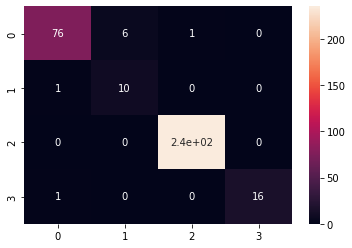

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

bu `vizualizatsiya` qanday ishlashini o'tkangi [loyihamda](https://github.com/farkhod-developer/Predict_wifi_signal/blob/main/Predict_location_wifi_signal.ipynb) tushintirgan edim.

## **Cross-validation**

bu usulda loyihamizni `20 marta` ishga tushiryapmiz

In [ ]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 20)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

         acc       0.95      0.90      0.92       384
        good       0.71      0.80      0.75        69
       unacc       0.99      0.99      0.99      1210
       vgood       0.94      0.98      0.96        65

    accuracy                           0.96      1728
   macro avg       0.89      0.92      0.91      1728
weighted avg       0.97      0.96      0.96      1728



## Decision Tree chizamiz

`Hyperparameters`

In [ ]:
cols = df.drop('Class', axis=1).columns
classes = df['Class'].unique()


DecisionTrees's Accuracy:  0.8121387283236994


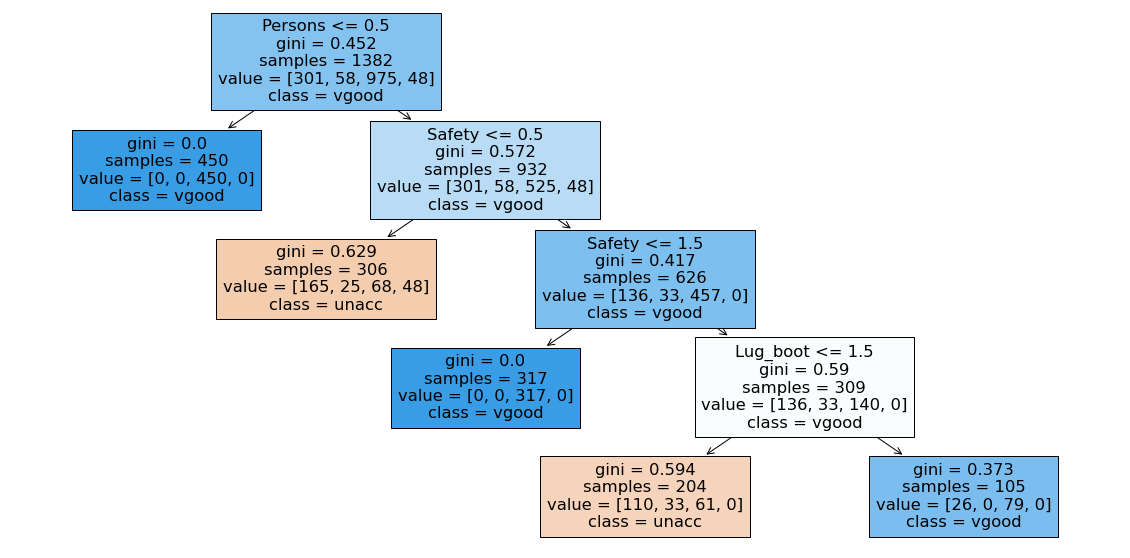

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

natija unchalik yaxshi emas, bor yo'g'i klasslarni ikkiga bo'lib qo'ydi

**`max_depth`** - shajara qavatlari soni

DecisionTrees's Accuracy:  0.9393063583815029


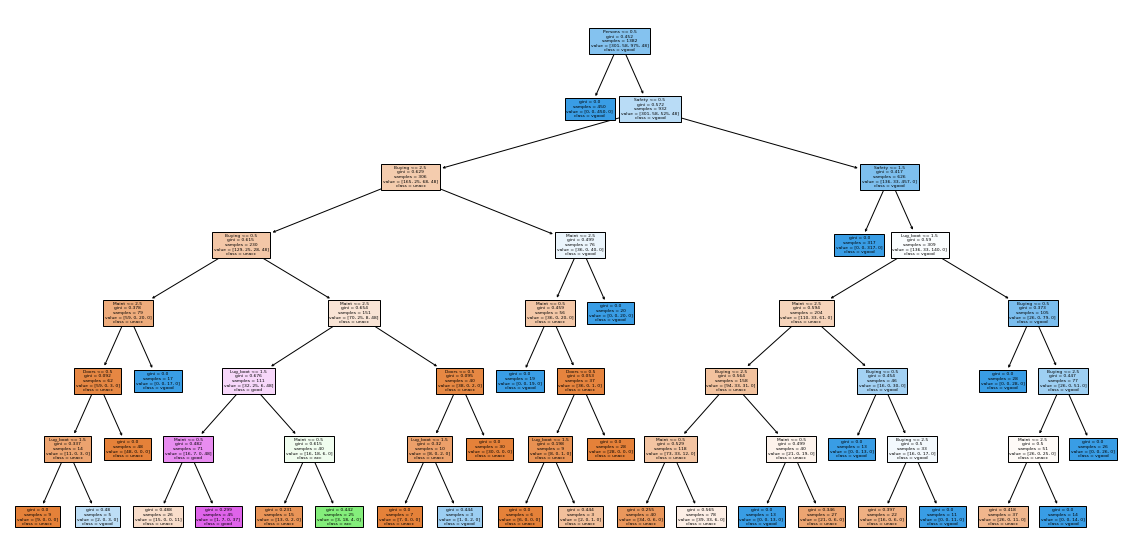

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=7)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

ko'rib turganingizdek natija yaxshi bo'lishiga qaramay `daraxtimiz` tushunarsiz xolatda `shoxlab` ketti

**`min_samples_leaf`** - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

DecisionTrees's Accuracy:  0.8526011560693642


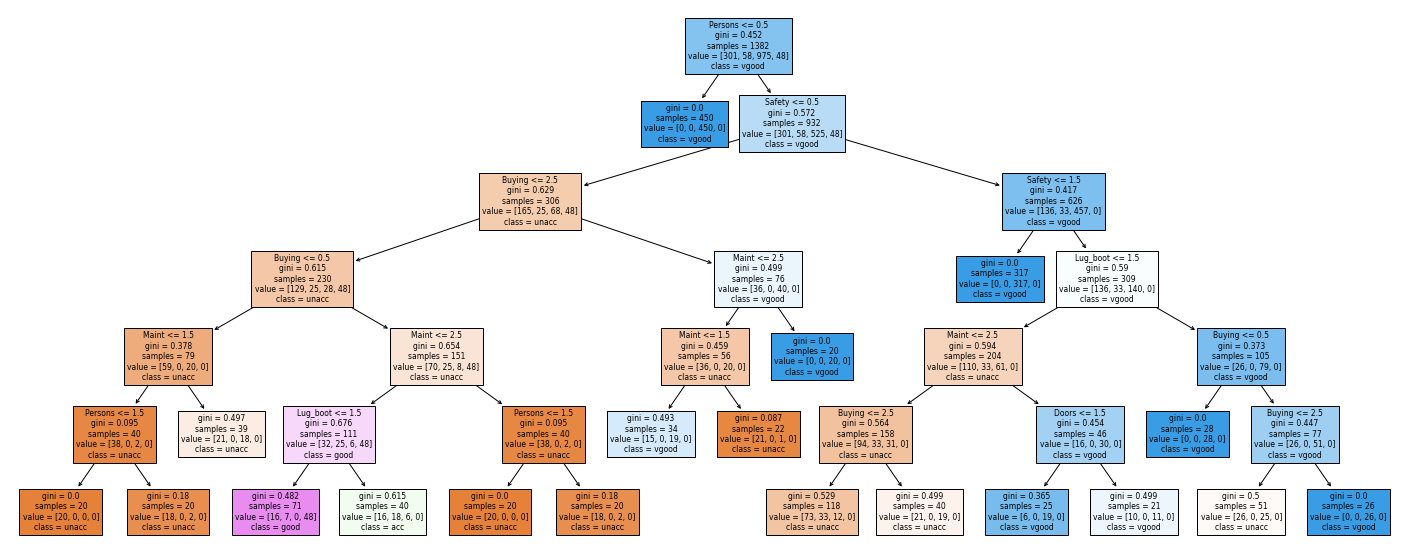

In [ ]:
tree_model = DecisionTreeClassifier(min_samples_leaf=20, max_depth=6)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(25,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

mana endi sal tushunarli holga keldi, albatta bu holatda natijamiz biroz tushishi mumkin, DecisionTreeClassifier haqida ham oldingi [loyihamizda](https://github.com/farkhod-developer/Predict_wifi_signal/blob/main/Predict_location_wifi_signal.ipynb) tushuntirgan edim

## Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - o'rmondagi daraxtlar soni.

`n_estimators=30` 30ta daraxt ishga tushirib oxirgi natijani oladi

In [ ]:
rf_model = RandomForestClassifier(n_estimators=30)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.99      0.88      0.93        83
        good       0.61      1.00      0.76        11
       unacc       0.99      1.00      0.99       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.96      0.91       346
weighted avg       0.98      0.97      0.97       346



`Random Forest` algoritmini qolganlaridan farqi, yuqoridagilarda bitta daraxtdan natijani olyapmiz, `RandomForestClassifierda` esa bir nechta daraxtlardan iborat bo'ladi, va har bir `DecisionTree` dan chiqqan natijaga qarab turib ovozga qo'yiladi va natija chiqariladi.

In [ ]:
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}%")

DecisionTrees's Accuracy: 0.97%
